# Ideal chain 

## Minimal assumptions
Consider a chain composed of $N+1$ monomers, linked by a rigid bond of fixed length $a$. This chain, subject to thermal fluctuations, constitutes the simplest model of polymers that we can treat computationally.

The assumptions are therefore:
- $N+1$ monomers
- $|\vec{a}_i|=a$
- independent random orientations, with 
    - mean $\langle \vec{a}_i\rangle =\vec{0}$
    - variance $\langle \vec{a}_i\vec{a}_j\rangle = a^2\delta_{ij}$


Let us create one.

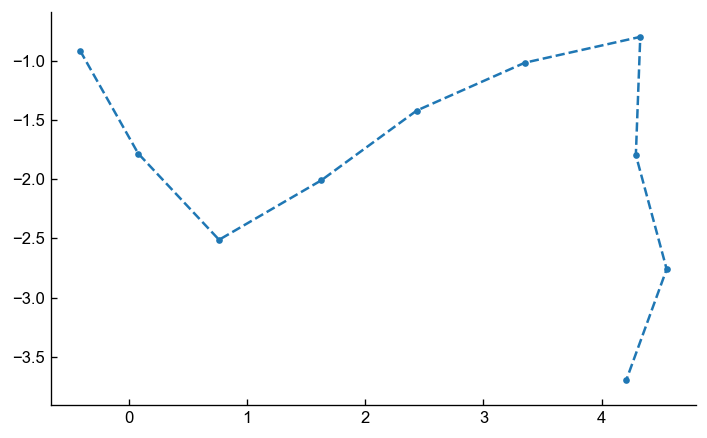

In [10]:
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.default_rng()

def random_orientations(N,dim=2):
    """Generate N vectors on the surface of a d-dimensional unit sphere (Muller 1959, Marsaglia 1972)."""
    pnt = rng.normal(0,1,(N,2))
    return pnt/np.linalg.norm(pnt, axis=1)[:,np.newaxis]

def create_ideal_chain(N=10,a=1):
    """Create an ideal chain of N monomers."""
    # draw N vectors on the unit circle and scale
    vectors_a = a*random_orientations(N,dim=2)
    chain = np.cumsum(vectors_a, axis=0)
    return chain

chain = create_ideal_chain(N=10)
plt.plot(chain[:,0], chain[:,1], '.--')
plt.axis('equal');


We can generate ensembles of chains.

In [39]:
def generate_ideal_chain_ensemble(N=100, nchains = 10000):
    chains = [create_ideal_chain(N=N) for i in range(nchains)]
    return chains

### End-to-end vector

The beginning and the end of the chain define a vector $$\vec{R}=\vec{r}_{N}-\vec{r}_0$$ which has specific statistical properties.

- The vector converges to the **null vector** for long enough chains $\langle\vec{R}\rangle=\left\langle\sum_{i=1}^N \vec{a}_i\right\rangle=\sum_{i=1}^N\left\langle\vec{a}_i\right\rangle=\overrightarrow{0}$


In [21]:
# end-to-end vectors
N = 100
end_to_ends = np.array([c[-1]-c[0] for c in generate_ideal_chain_ensemble(N=N,nchains=10000)])
print(N,np.mean(end_to_ends, axis=0))


100 [0.10941602 0.00708966]


-  The average **square of the distance** grows like $N$, $$\left\langle|\bar{R}|^2\right\rangle=\left\langle\left(\sum_{i=1}^N \vec{a}_i\right) \cdot\left(\sum_{i=1}^M \stackrel{\rightharpoonup}{a}_j\right)\right\rangle=N a^2+\sum_{i=1}^N \sum_{j=1}^N\langle\left\langle\vec{a}_i \cdot \vec{a}_j\right\rangle=a^2 N \sim N$$

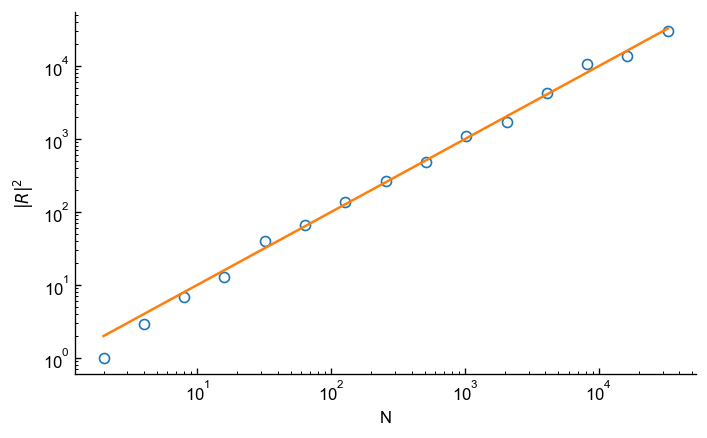

In [57]:

Ns = 2**np.arange(1,16)
norms = []
for N in Ns:
    chains = np.array(generate_ideal_chain_ensemble(N=N,nchains=100))
    end_to_ends = chains[:,-1,:]-chains[:,0,:] 
    norms.append((np.linalg.norm(end_to_ends, axis=1)**2).mean())

plt.loglog(Ns,norms, 'o', mfc="None")
plt.loglog(Ns,Ns)
plt.xlabel('N')
plt.ylabel(r'$|R|^2$');

Clearly, such scaling is intimately linked to the behaviour of a random walker, as seen in the previous [Random walk](rw) lesson.
